In [1]:
# with coordinates of each points 

import h5py
import numpy as np
filepath1 = "/data3/DayeKim/eflash_outputfile/BF3/collect_patches_BF3.h5"
filepath2 = "/data3/DayeKim/eflash_outputfile/HP_2/collect_patches_th500_HP2.h5"
filepath3 = "/data3/DayeKim/eflash_outputfile/HP_4/561/collect_patches_HP-4.h5"
filepath4 = "/data3/DayeKim/eflash_outputfile/M1-1/collect_patches_M1-1_1000.h5"
filepath5 = "/data3/DayeKim/eflash_outputfile/M1-5/collect_patches_M1-5_1200.h5"
filepath6 = "/data3/DayeKim/eflash_outputfile/M1-4/Thr400_collect_patches_M1-4.h5"
filepath7 = "/data3/DayeKim/eflash_outputfile/M1-3/Thr400_collect_patches_M1-3.h5"
filepath8 = "/data3/DayeKim/eflash_outputfile/BF1/collect_patches_BF-1_t600.h5"
filepath9 = "/data3/DayeKim/eflash_outputfile/HP_5/collect_patches_th100_HP5.h5"


files = [filepath1 ,filepath2,filepath3,filepath4,filepath5, filepath6, filepath7, filepath8, filepath9]
X_stack = np.empty((0, 3, 31, 31))
coords_stack = np.empty((0, 3))

for file in files:
    with h5py.File(file, "r") as f:
        #print(f.keys())
    #     patches = f[list(f.keys())[0]][()]
        patches_xy = f[list(f.keys())[1]][()]
        patches_xz = f[list(f.keys())[2]][()]
        patches_yz = f[list(f.keys())[3]][()]
        X = np.stack((patches_xy, patches_xz, patches_yz), axis=1)
        print("half X", int(X.shape[0])/3*2)
        X_stack = np.vstack((X_stack, X[int(X.shape[0]/3*2):]))
        #print("X_stack", X_stack.shape)

    #     n_patches = len(patches_xy[0])
    #     patch_len = np.prod(patches_xy[0].shape[1:])
    #     n_channels = len(patches_xy)
    #     n_features = n_channels * patch_len * 3
    #     n_patches = n_patches
    #     n_features = n_features
        x = f[list(f.keys())[4]][()]
        y = f[list(f.keys())[5]][()]
        z = f[list(f.keys())[6]][()]
        #print(x, y, z)
        coords = np.stack((x, y, z), axis=1)
        #print("coords", coords.shape)
        coords_stack = np.vstack((coords_stack, coords))
        #print("coords_stack", coords_stack.shape)
    
print(X_stack.shape)
print("done! :D ")


half X 37754.666666666664
half X 35888.0
half X 120983.33333333333
half X 36192.666666666664
half X 49564.0
half X 17357.333333333332
half X 38350.666666666664
half X 13862.666666666666
half X 159802.0
(254881, 3, 31, 31)
done! :D 


In [3]:
import pickle as pkl

with open("/data3/DayeKim/eflash_outputfile/BF3/eflash_train_BF3_output.pkl", "rb") as f:
    output_1 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/HP_2/eflash_train_output_th500_HP2.pkl", "rb") as f:
    output_2 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/HP_4/561/eflash_train_output_HP-4.pkl", "rb") as f:
    output_3 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/M1-1/eflash_train_output_M1-1_1000.pkl", "rb") as f:
    output_4 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/M1-5/eflash_train_output_M1-5_1200.pkl", "rb") as f:
    output_5 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/M1-4/Thr400_eflash_train_output_M1-4.pkl", "rb") as f:
    output_6 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/M1-3/Thr400_eflash_train_output_M1-3.pkl", "rb") as f:
    output_7 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/BF1/eflash_train_output_BF-1_t600.pkl", "rb") as f:
    output_8 = pkl.load(f)
with open("/data3/DayeKim/eflash_outputfile/HP_5/eflash_train_output_th100_HP5.pkl", "rb") as f:
    output_9 = pkl.load(f)

outputs = [output_1, output_2, output_3, output_4, output_5, output_6, output_7, output_8, output_9]
y_stack = np.empty((0,))
for output in outputs:
    y = output["marks"]
    print(int(output["marks"].shape[0]/3*2))
    y_stack = np.concatenate((y_stack, output["marks"][int(output["marks"].shape[0]/3*2):]))
print("total_y_stack", y_stack.shape)
X_marks = X_stack[y_stack!=0]
y_marks = y_stack[y_stack!=0]
print("marked data", X_marks.shape, y_marks.shape)
y_marks[y_marks == -1] = 0 # negative
y_marks_2 = y_marks.copy()
y_marks_2[y_marks_2 == 2] = 1 # binary classification

#output_1.keys()

37754
35888
120983
36192
49564
17357
38350
13862
159802
total_y_stack (254881,)
marked data (17002, 3, 31, 31) (17002,)


In [5]:
# save; X_marks, y_marks_2.

print(type(X_marks), type(y_marks_2))

np.save("/data3/DayeKim/eflash_outputfile/dataset/X_marks.npy", X_marks)
np.save("/data3/DayeKim/eflash_outputfile/dataset/y_marks_2.npy", y_marks_2)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [29]:
np.unique(y_marks_2)

array([0., 1.])

In [30]:
# augment

def augment(xy_patch, xz_patch, yz_patch):
    """Return a sequence reflected and rotated patches

    The Z direction is not symmetric - objects tend to have an anti-shadow
    downward, so we leave that alone and also don't rotate in Z. Arguably,
    there are more subtle artifacts in X and Y that would prevent you from
    switching axes or from flipping directions, but it's probably more
    worthwhile to train on the augmented set than not.

    :param xy_patch:
    :param xz_patch:
    :param yz_patch:
    :return: a sequence with reflected and rotated patches. Each element of
    the sequence is a 3-tuple of patches.
    """
    identity_slice = slice(None)
    reflect_slice = slice(None, None, -1)
    result = []
    for xs, ys, transpose in itertools.product(
            (identity_slice, reflect_slice),
            (identity_slice, reflect_slice),
            (False, True)):
        xy_patch_out = xy_patch[ys, xs]
        xz_patch_out = xz_patch[:, xs]
        yz_patch_out = yz_patch[:, ys]
        if transpose:
            xz_patch_out, yz_patch_out = yz_patch_out, xz_patch_out
            xy_patch_out = xy_patch_out.transpose()
        result.append((xy_patch_out, xz_patch_out, yz_patch_out))
    return result

In [31]:
from sklearn.model_selection import train_test_split
import pandas as pd 

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_marks, y_marks_2, test_size=0.5, random_state=17, stratify=y_marks_2)

print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

(12721, 3, 31, 31) (12721, 3, 31, 31)
(12721,) (12721,)


In [32]:
#print(np.unique(y_test)) #noncell, neuron, astrocyde '''''''/'''
print(np.unique(y_test_2))

[0. 1.]


In [33]:
import numpy as np
import cv2
import itertools

# 예시 데이터 (160, 3, 31, 31) 형태의 이미지 데이터와 레이블
original_images = X_train_2  
original_labels = y_train_2  

# 이미지 데이터와 레이블를 누적할 배열을 생성
augmented_images = []
augmented_labels = []

# 데이터를 증강하고 저장
for i in range(len(original_images)):
    image = original_images[i]  # 각 이미지
    label = original_labels[i]  # 해당 이미지의 레이블
    result = augment(image[0],image[1],image[2])
    
    # 증강된 이미지와 레이블을 저장
    augmented_images.extend(result)
    augmented_labels.extend([label]*8)

# 증강된 이미지와 레이블를 NumPy 배열로 변환
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 결과 데이터 크기 확인
print(augmented_images.shape) 
print(augmented_labels.shape) 


(101768, 3, 31, 31)
(101768,)


In [34]:
shuffled_indices = np.random.permutation(len(augmented_images))
augmented_images = augmented_images[shuffled_indices]
augmented_labels = augmented_labels[shuffled_indices]

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision import models



In [36]:

#X_train_t = X_train.astype(np.float64)
#X_test_t = X_test.astype(np.float64)
#y_train_t = y_train.astype(np.int64)
#y_test_t = y_test.astype(np.int64)

X_train_t = torch.from_numpy(augmented_images.astype(np.float64))
X_test_t = torch.from_numpy(X_test_2.astype(np.float64))
y_train_t = torch.from_numpy(augmented_labels.astype(np.int64))
y_test_t = torch.from_numpy(y_test_2.astype(np.int64))

#X_train_2_t = X_train_2.astype(np.float64)
#X_test_2_t = X_test_2.astype(np.float64)
#y_train_2_t = y_train_2.astype(np.int64)
#y_test_2_t = y_test_2.astype(np.int64)

# X_train_2_t = torch.from_numpy(X_train_2.astype(np.float64))
# X_test_2_t = torch.from_numpy(X_test_2.astype(np.float64))
# y_train_2_t = torch.from_numpy(y_train_2.astype(np.int64))
# y_test_2_t = torch.from_numpy(y_test_2.astype(np.int64))
# print(X_train_t.size())
# print(X_test_t.size())
# print(y_train_t.size())
# print(y_test_t.size())

In [37]:
# 데이터 전처리 및 변환
transform = transforms.Compose([
    #transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_X = transform(X_train_t)  # 입력 이미지 데이터
train_y = y_train_t  # 분류 레이블 (0, 1, 2 중 하나)
# 이제 파인튜닝된 모델을 사용하여 테스트 세트로 예측을 수행합니다.
test_X = transform(X_test_t)  # 테스트 데이터 전처리
test_y = y_test_t  # 테스트 데이터 레이블
print("here")
train_X = train_X.float()#.to("cuda")
train_y = train_y#.to("cuda")
test_X = test_X.float()#.to("cuda")
test_y = test_y#.to("cuda")
print(train_X.is_cuda)
print(train_y.is_cuda)
#print(train_dataset.is_cuda)
#print(train_loader.is_cuda)

print(train_X.shape, train_y.shape)


/home/super/anaconda3/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


here
False
False
torch.Size([101768, 3, 224, 224]) torch.Size([101768])


In [38]:

# 데이터 로더 생성
batch_size = 32

train_dataset = TensorDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# 테스트 데이터를 DataLoader로 만들기
test_dataset = TensorDataset(test_X, test_y)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [25]:
import pickle as pkl

with open("/data3/DayeKim/main/test_loader.pkl", "wb") as f:
    pkl.dump(test_loader, f)

with open("/data3/DayeKim/main/train_loader.pkl", "wb") as f:
    pkl.dump(train_loader, f)

In [29]:

# DataLoader에서 배치별로 데이터를 가져와 클래스별 갯수를 파악
class_0_count = 0
class_1_count = 0

for batch_X, batch_y in test_loader:
    # 클래스가 0인 데이터의 갯수 파악
    class_0_count += torch.sum(batch_y == 0).item()
    
    # 클래스가 1인 데이터의 갯수 파악
    class_1_count += torch.sum(batch_y == 1).item()

print(f'Class 0 Count: {class_0_count}')
print(f'Class 1 Count: {class_1_count}')

print(int(class_0_count/class_1_count))

Class 0 Count: 11054
Class 1 Count: 1667
6


## Img check

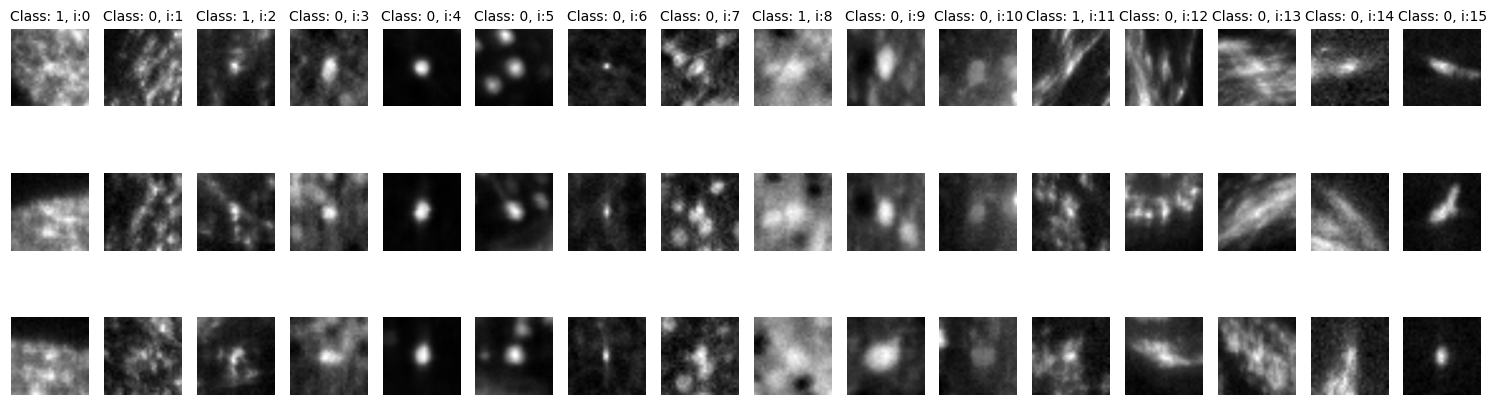

In [13]:
import matplotlib.pyplot as plt
import torchvision

# DataLoader로부터 데이터 가져오기
inputs, classes = train_X, train_y

start= 16*2
num_images_to_show = 16
selected_images = inputs[start:start+num_images_to_show] #.cpu()  # CUDA 장치에서 호스트 메모리로 복사
selected_classes = classes[start:start+num_images_to_show]#.cpu()
# CUDA 장치에서 호스트 메모리로 복사

# 이미지를 시각화
fig, axes = plt.subplots(3, num_images_to_show, figsize=(15, 5))  # 이미지를 더 크게 표시하도록 figsize를 조정

for i in range(num_images_to_show):
    image = selected_images[i]  # (3, 224, 224) 형태의 이미지
    label = selected_classes[i]

    # 각 채널을 따로 시각화
    for channel in range(3):
        ax = axes[channel, i]
        ax.imshow(image[channel], cmap='gray')  # 각 채널을 회색조로 표시
        if channel == 0:
            ax.set_title(f'Class: {label}, i:{i}', fontsize=10)  # 텍스트 크기를 늘림
        ax.axis('off')

plt.tight_layout()  # 그림 간 간격을 조절하여 레이아웃을 더 좋게 만듭니다.
plt.show()


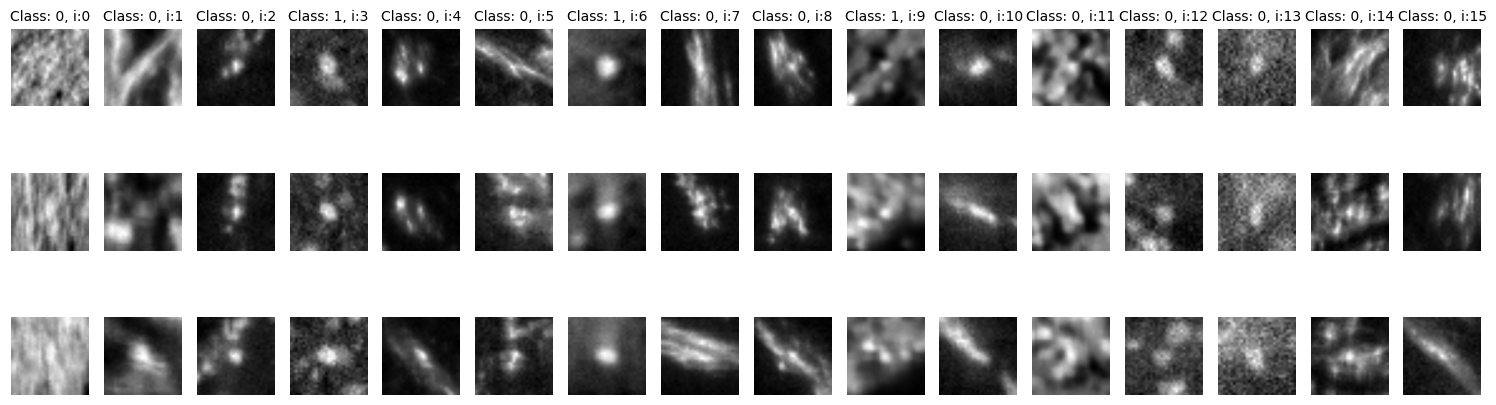

In [11]:
import matplotlib.pyplot as plt
import torchvision

# DataLoader로부터 데이터 가져오기
inputs, classes = test_X, test_y

# 5장의 이미지 선
start= 16*2
num_images_to_show = 16
selected_images = inputs[start:start+num_images_to_show] #.cpu()  # CUDA 장치에서 호스트 메모리로 복사
selected_classes = classes[start:start+num_images_to_show]#.cpu()
# CUDA 장치에서 호스트 메모리로 복사

# 이미지를 시각화
fig, axes = plt.subplots(3, num_images_to_show, figsize=(15, 5))  # 이미지를 더 크게 표시하도록 figsize를 조정

for i in range(num_images_to_show):
    image = selected_images[i]  # (3, 224, 224) 형태의 이미지
    label = selected_classes[i]

    # 각 채널을 따로 시각화
    for channel in range(3):
        ax = axes[channel, i]
        ax.imshow(image[channel], cmap='gray')  # 각 채널을 회색조로 표시
        if channel == 0:
            ax.set_title(f'Class: {label}, i:{i}', fontsize=10)  # 텍스트 크기를 늘림
        ax.axis('off')

plt.tight_layout()  # 그림 간 간격을 조절하여 레이아웃을 더 좋게 만듭니다.
plt.show()


## RESNET

In [57]:
#del pretrained_model
del images
del labels

In [56]:
#print(pretrained_model.device.type == "cuda")
print(images.device.type == "cuda")
print(labels.device.type == "cuda")

True
True


In [171]:
del pretrained_model

In [4]:
# RESNET
# 미리 훈련된 모델 로드

pretrained_model = models.resnet18(weights=False)

# 기존의 마지막 레이어 (클래스 분류용)를 제거
num_features = pretrained_model.fc.in_features
pretrained_model.fc = nn.Identity()  # 기존의 마지막 레이어를 제거

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)#,  # 1개의 출력 뉴런 (이진 분류)
            #nn.Sigmoid()  # 이진 분류를 위한 시그모이드 활성화 함수
        )

    def forward(self, x):
        x = self.fc(x)
        return x

# 이진 분류 모델 생성
binary_model = BinaryClassifier()

for param in pretrained_model.parameters():
    param.requires_grad = True

# 모델 합치기: ResNet 특성 추출 레이어와 이진 분류 레이어를 연결
pretrained_model = nn.Sequential(pretrained_model, binary_model)

# # 모델의 파라미터 확인
# for param in pretrained_model.parameters():
#     if param.requires_grad:
#         print(param.shape)


# # 모델의 fully connected 레이어를 수정합니다.
# num_classes = 1  # 3가지 클래스로 분류
# #for param in pretrained_model.parameters():
# #    param.requires_grad = False #layer sticked
# #pretrained_model.fc.requires_grad = True
# pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# # 모델의 파라미터를 학습 가능하도록 설정
# for param in pretrained_model.parameters():
#     param.requires_grad = True


criterion = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([10]).to('cuda'))
#criterion = #nn.BCELoss()#pos_weight=torch.FloatTensor([6]))
optimizer = optim.Adam(pretrained_model.parameters(), lr=0.0001)

# GPU를 사용할 경우
pretrained_model = pretrained_model.to('cuda')
for param in pretrained_model.parameters():
    param = param.to('cuda')
# 옵티마이저 설정
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, pretrained_model.parameters()), lr=0.001)
#criterion = nn.BCELoss(weight=torch.FloatTensor([1, 6])) # 이진 분류 손실 함수

current_device = next(pretrained_model.parameters()).device
print(f"Model is now on {current_device}.")
#bce_criterion = nn.BCEWithLogitsLoss()
#multi_criterion = nn.MultiLabelSoftMarginLoss()

/home/super/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model is now on cuda:0.


In [5]:
print(pretrained_model)

Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [6]:

accuracy_list = []
loss_list = []


# 파인튜닝 훈련
num_epochs = 5
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0
    for images, labels in train_loader:
        # GPU를 사용할 경우
        images, labels = images.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = pretrained_model(images)
        #print(outputs, labels.float().view(-1, 1))
        #print(outputs.device, labels.float().view(-1, 1).device)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        
        predicted = (outputs >= 0.5).int()
        total_samples += labels.size(0)
        total_correct += (predicted.squeeze() == labels).sum().item()

    accuracy = 100 * total_correct / total_samples
    accuracy_list.append(accuracy)
    loss_list.append(loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {loss.item():.4f} Accuracy: {accuracy:.2f}%')


    pretrained_model.eval()  # 모델을 평가 모드로 전환
    total_correct_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for images_val, labels_val in test_loader:  # Validation 데이터 사용
            images_val, labels_val = images_val.to('cuda'), labels_val.to('cuda')

            outputs_val = pretrained_model(images_val)
            predicted_val = (outputs_val >= 0.5).int()
            total_samples_val += labels_val.size(0)
            total_correct_val += (predicted_val.squeeze() == labels_val).sum().item()

    val_accuracy = 100 * total_correct_val / total_samples_val
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

    pretrained_model.train()  # 모델을 다시 훈련 모드로 전환
print('파인튜닝이 완료되었습니다.')

# 이제 파인튜닝된 모델을 사용하여 예측을 수행할 수 있습니다.


NameError: name 'train_loader' is not defined

In [7]:
torch.save(pretrained_model.state_dict(), '/data3/DayeKim/main/9brains_half_weight_resnet_model_3_90_91_83.pth')

In [114]:
type(next(iter(test_loader)))



list

In [8]:
#pretrained_model.load_state_dict(torch.load('/data3/DayeKim/main/9brains_half_weight_resnet_model_3_90_91_83.pth'))
pretrained_model.load_state_dict(torch.load('/data3/DayeKim/main/9brains_half_resnet_model_0.9318.pth'))

# '/data3/DayeKim/main/9brains_half_resnet_model_0.9318.pth'

<All keys matched successfully>

In [9]:
import pickle as pkl

with open("/data3/DayeKim/main/test_loader.pkl", "rb") as f:
    test_loader = pkl.load(f)

In [10]:
import numpy as np
# 이제 파인튜닝된 모델을 사용하여 테스트 세트로 예측을 수행합니다.

# 테스트 세트로 예측하기
pretrained_model.eval()  # 모델을 평가 모드로 전환
total_correct = 0
total_samples = 0

predicted_stack = np.array([])
label_stack = np.array([])
output_stack = np.array([])


with torch.no_grad():
    for images, labels in test_loader:
        # GPU를 사용할 경우
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = pretrained_model(images)
        predicted = (outputs >= 0.5).int()
        predicted_stack = np.concatenate((predicted_stack, predicted.squeeze().cpu()))
        label_stack = np.concatenate((label_stack, labels.cpu()))
        output_stack = np.concatenate((output_stack, outputs.squeeze().cpu()))
        
        total_samples += labels.size(0)
        total_correct += (predicted.squeeze() == labels).sum().item()

test_accuracy = 100 * total_correct / total_samples
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 93.11%


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_specificity_sensitivity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    return specificity, sensitivity

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 예시 데이터 생성
y_true = label_stack
y_pred = predicted_stack

# 특이도와 민감도 계산
specificity, sensitivity = calculate_specificity_sensitivity(y_true, y_pred)
print(f'Specificity: {specificity:.3f}')
print(f'Sensitivity: {sensitivity:.3f}')

Specificity: 0.976
Sensitivity: 0.633


In [12]:
print(predicted_stack.shape)
print(label_stack.shape)

(12721,)
(12721,)


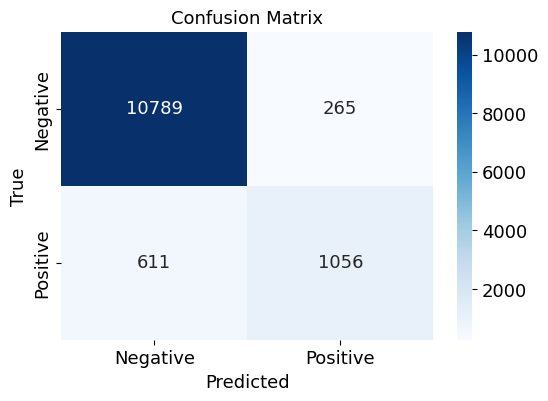

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




confusion_mat = confusion_matrix(label_stack, predicted_stack)

# # Confusion Matrix를 데이터프레임으로 변환
# labels = ['Negative', 'Positive']  # 이진 분류의 경우
# df = pd.DataFrame(confusion_mat, columns=labels, index=labels)

# # 결과 출력
# print("Confusion Matrix:\n", df)


# Confusion Matrix를 데이터프레임으로 변환
labels = ['Negative', 'Positive']  # 이진 분류의 경우
df = pd.DataFrame(confusion_mat, columns=labels, index=labels)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, fmt="d", cmap="Blues")
plt.rc('font', size=13)        # 기본 폰트 크기
plt.xlabel("Predicted", size=13)
plt.ylabel("True", size=13)
plt.title("Confusion Matrix", size=13)
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=13)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=13)  # y축 눈금 폰트 크기
# Confusion Matrix 생성

plt.savefig('/data4/DayeKim/DK/eflash_outputfile/eflash_outputfile/paperfig/confusion.svg', format='svg')
plt.show()

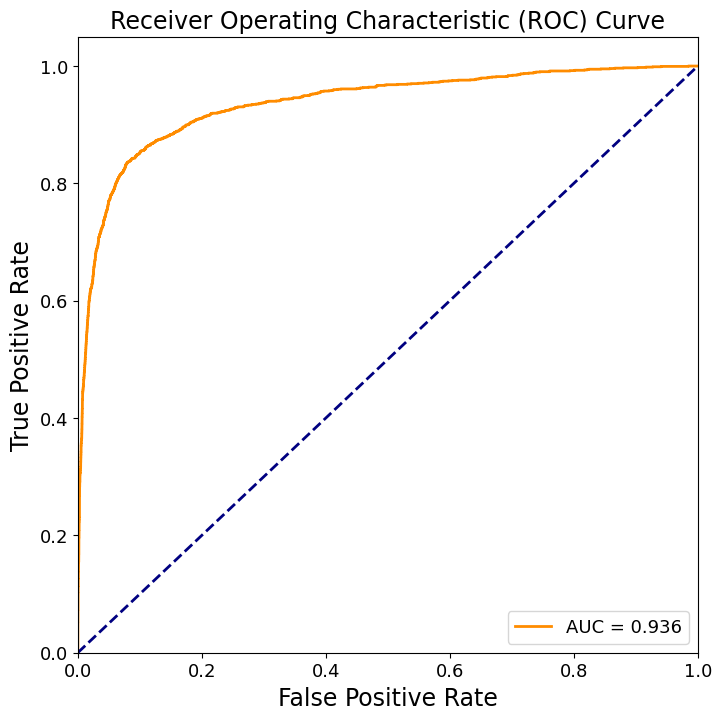

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# ROC curve 계산
fpr, tpr, thresholds = roc_curve(label_stack, output_stack)
roc_auc = auc(fpr, tpr)

# ROC curve 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=17)
plt.ylabel('True Positive Rate', size=17)
plt.title('Receiver Operating Characteristic (ROC) Curve', size=17)
plt.legend(loc="lower right")

plt.rc('font', size=17)        # 기본 폰트 크기


plt.savefig('/data4/DayeKim/DK/eflash_outputfile/eflash_outputfile/paperfig/ROC.svg', format='svg')
plt.show()

In [36]:
# if accuracy > 90%, 

In [88]:
torch.save(pretrained_model.state_dict(), '/data3/DayeKim/main/9brains_half_weight_resnet_model_0.9087.pth')

# When you wanna use the models

In [104]:
# RESNET
# 미리 훈련된 모델 로드
#del pretrained_model
pretrained_model = models.resnet18(weights=False)

# 기존의 마지막 레이어 (클래스 분류용)를 제거
num_features = pretrained_model.fc.in_features
pretrained_model.fc = nn.Identity()  # 기존의 마지막 레이어를 제거

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),  # 1개의 출력 뉴런 (이진 분류)
            nn.Sigmoid()  # 이진 분류를 위한 시그모이드 활성화 함수
        )

    def forward(self, x):
        x = self.fc(x)
        return x

# 이진 분류 모델 생성
binary_model = BinaryClassifier()

for param in pretrained_model.parameters():
    param.requires_grad = True

pretrained_model = nn.Sequential(pretrained_model, binary_model)
pretrained_model = pretrained_model.to('cuda')

criterion = nn.BCELoss()  # 이진 분류 손실 함수
optimizer = optim.Adam(pretrained_model.parameters(), lr=0.0001)


/home/super/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [105]:
#pretrained_model.load_state_dict(torch.load('/data3/DayeKim/main/9brains_half_resnet_model_0.9318.pth'))
# 이제 파인튜닝된 모델을 사용하여 테스트 세트로 예측을 수행합니다.

# 테스트 세트로 예측하기
pretrained_model.eval()  # 모델을 평가 모드로 전환
total_correct = 0
total_samples = 0

predicted_stack = np.array([])
label_stack = np.array([])

with torch.no_grad():
    for images, labels in test_loader:
        # GPU를 사용할 경우
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = pretrained_model(images)
        predicted = (outputs >= 0.5).int()
        predicted_stack = np.concatenate((predicted_stack, predicted.squeeze().cpu()))
        label_stack = np.concatenate((label_stack, labels.cpu()))
        total_samples += labels.size(0)
        total_correct += (predicted.squeeze() == labels).sum().item()

test_accuracy = 100 * total_correct / total_samples
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 86.90%


In [ ]:
print("after that, lets predict the whole points with X_stack. And use the coords_stack")
# make X_stack to input format, and get label==1 with patches and points

In [106]:
print(label_stack.shape)
print(predicted_stack.shape)

(12721,)
(12721,)


## Plot

In [15]:
print(label_stack[:500])
print(predicted_stack[:500])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.

Specificity: 0.91
Sensitivity: 0.83
Accuracy: 0.90


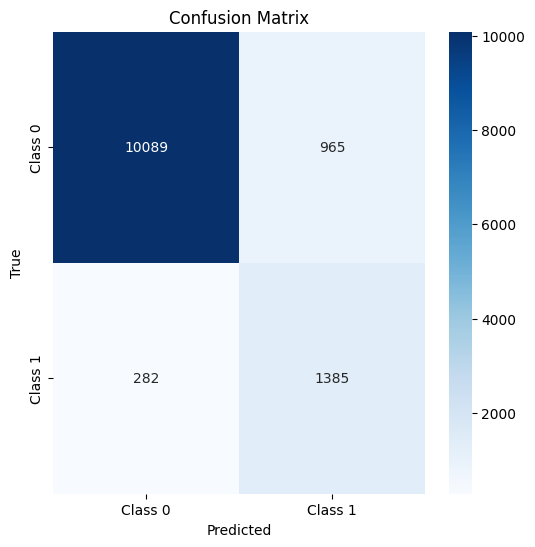

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_specificity_sensitivity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    return specificity, sensitivity

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 예시 데이터 생성
y_true = label_stack
y_pred = predicted_stack

# 특이도와 민감도 계산
specificity, sensitivity = calculate_specificity_sensitivity(y_true, y_pred)
print(f'Specificity: {specificity:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')

# 정확도 계산
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 혼동 행렬 시각화
classes = ['Class 0', 'Class 1']
plot_confusion_matrix(y_true, y_pred, classes)


# else models

## VGGnet

In [ ]:
# 2class classification
# 미리 훈련된 모델 로드
del pretrained_model
pretrained_model = models.vgg16(weights=True)

# 기존의 마지막 레이어 (클래스 분류용)를 제거
num_features = pretrained_model.classifier[6].in_features
pretrained_model.classifier[6] = nn.Identity()  # 기존의 마지막 레이어를 제거

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),  # 1개의 출력 뉴런 (이진 분류)
            nn.Sigmoid()  # 이진 분류를 위한 시그모이드 활성화 함수
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

# 이진 분류 모델 생성
binary_model = BinaryClassifier()

# 모델 합치기: ResNet 특성 추출 레이어와 이진 분류 레이어를 연결
pretrained_model = nn.Sequential(pretrained_model, binary_model)

for param in pretrained_model.parameters():
    param.requires_grad = True
    
# GPU를 사용할 경우
pretrained_model = pretrained_model.to('cuda')

# 옵티마이저 설정
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, pretrained_model.parameters()), lr=0.001)
criterion = nn.BCELoss()  # 이진 분류 손실 함수
optimizer = optim.Adam(pretrained_model.parameters(), lr=0.001)

#bce_criterion = nn.BCEWithLogitsLoss()
#multi_criterion = nn.MultiLabelSoftMarginLoss()

In [ ]:
pretrained_model

In [ ]:

accuracy_list = []
loss_list = []


# 파인튜닝 훈련
num_epochs = 30
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0
    for images, labels in train_loader:
        # GPU를 사용할 경우
        images, labels = images.to('cuda'), labels.to('cuda')
        
        optimizer.zero_grad()
        outputs = pretrained_model(images)

        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        
        predicted = (outputs >= 0.5).int()
        total_samples += labels.size(0)
        total_correct += (predicted.squeeze() == labels).sum().item()

    accuracy = 100 * total_correct / total_samples
    accuracy_list.append(accuracy)
    loss_list.append(loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {loss.item():.4f} Accuracy: {accuracy:.2f}%')

    # 중간 중간에 Validation 세트를 사용하여 모델 평가
    if (epoch + 1) % 5 == 0:
        pretrained_model.eval()  # 모델을 평가 모드로 전환
        total_correct_val = 0
        total_samples_val = 0

        with torch.no_grad():
            for images_val, labels_val in test_loader:  # Validation 데이터 사용
                images_val, labels_val = images_val.to('cuda'), labels_val.to('cuda')
                
                outputs_val = pretrained_model(images_val)
                predicted_val = (outputs_val >= 0.5).int()
                total_samples_val += labels_val.size(0)
                total_correct_val += (predicted_val.squeeze() == labels_val).sum().item()

        val_accuracy = 100 * total_correct_val / total_samples_val
        print(f'Validation Accuracy: {val_accuracy:.2f}%')

        pretrained_model.train()  # 모델을 다시 훈련 모드로 전환
print('파인튜닝이 완료되었습니다.')

# 이제 파인튜닝된 모델을 사용하여 예측을 수행할 수 있습니다.


# else

In [ ]:
# 2 classification 

# 데이터 전처리 및 변환
transform = transforms.Compose([
    #transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_X_2 = transform(X_train_2_t)  # 입력 이미지 데이터
train_y_2 = y_train_2_t  # 분류 레이블 (0, 1, 2 중 하나)
# 이제 파인튜닝된 모델을 사용하여 테스트 세트로 예측을 수행합니다.
test__X_2 = transform(X_test_2_t)  # 테스트 데이터 전처리
test_y_2 = y_test_2_t  # 테스트 데이터 레이블

train_X_2 = train_X_2.cuda().float()
train_y_2 = train_y_2.cuda()
test_X_2 = test_X_2.cuda().float()
test_y_2 = test_y_2.cuda()
print(train_X_2.is_cuda)
print(train_y_2.is_cuda)
#print(train_dataset.is_cuda)
#print(train_loader.is_cuda)

print(train_X_2.shape, train_y_2.shape)


# 데이터 로더 생성
batch_size = 64
train_dataset_2 = TensorDataset(train_X_2, train_y_2)
train_loader_2 = DataLoader(train_dataset_2, batch_size=batch_size, shuffle=True)
# 테스트 데이터를 DataLoader로 만들기
test_dataset_2 = TensorDataset(test_X_2, test_y_2)
test_loader_2 = DataLoader(test_dataset_2, batch_size=batch_size)

In [ ]:
# 2-class classification

#import torch
#import torch.nn as nn
#import torch.optim as optim
#from torch.utils.data import DataLoader, TensorDataset
#from torchvision import transforms
#from torchvision import models
torch.backends.cudnn.enabled = True

# 미리 훈련된 모델 로드
pretrained_model_2 = models.resnet18(pretrained=False)

# 모델의 fully connected 레이어를 수정합니다.
num_classes = 2  # 2가지 클래스로 분류

#for param in pretrained_model.parameters():
#    param.requires_grad = False #layer sticked
#pretrained_model.fc.requires_grad = True
pretrained_model_2.fc = nn.Linear(pretrained_model_2.fc.in_features, num_classes)

# GPU를 사용할 경우
pretrained_model_2 = pretrained_model_2.to('cuda')

# 옵티마이저 설정
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, pretrained_model.parameters()), lr=0.001)
optimizer = optim.Adam(pretrained_model_2.parameters(), lr=0.001)

# 손실 함수 설정
criterion = nn.CrossEntropyLoss()

# 파인튜닝 훈련
num_epochs = 30
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0
    
    for images, labels in train_loader_2:
        # GPU를 사용할 경우
        images, labels = images.to('cuda'), labels.to('cuda')
        
        optimizer.zero_grad()
        outputs = pretrained_model_2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        #print("predicted", predicted)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    accuracy = 100 * total_correct / total_samples
    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {loss.item():.4f} Accuracy: {accuracy:.2f}%')

    # 중간 중간에 Validation 세트를 사용하여 모델 평가
    if (epoch + 1) % 5 == 0:
        pretrained_model_2.eval()  # 모델을 평가 모드로 전환
        total_correct_val = 0
        total_samples_val = 0

        with torch.no_grad():
            for images_val, labels_val in test_loader_2:  # Validation 데이터 사용
                images_val, labels_val = images_val.to('cuda'), labels_val.to('cuda')
                
                outputs_val = pretrained_model_2(images_val)
                _, predicted_val = torch.max(outputs_val, 1)
                total_samples_val += labels_val.size(0)
                total_correct_val += (predicted_val == labels_val).sum().item()
        print("predicted_val", predicted_val)
        val_accuracy = 100 * total_correct_val / total_samples_val
        print(f'Validation Accuracy: {val_accuracy:.2f}%')

        pretrained_model_2.train()  # 모델을 다시 훈련 모드로 전환
print('파인튜닝이 완료되었습니다.')

# 이제 파인튜닝된 모델을 사용하여 예측을 수행할 수 있습니다.


In [ ]:
outputs

In [ ]:
_, predicted = torch.max(outputs, 1)

In [ ]:
predicted


In [ ]:
inputs.shape

In [ ]:
labels

In [ ]:
import matplotlib.pyplot as plt
import torchvision

# DataLoader로부터 데이터 가져오기
inputs, classes = next(iter(train_loader_2))

# 5장의 이미지 선택
num_images_to_show = 16
selected_images = inputs[:num_images_to_show].cpu()  # CUDA 장치에서 호스트 메모리로 복사
selected_classes = classes[:num_images_to_show].cpu()
# CUDA 장치에서 호스트 메모리로 복사

# 이미지를 시각화
fig, axes = plt.subplots(3, num_images_to_show, figsize=(15, 5))  # 이미지를 더 크게 표시하도록 figsize를 조정

for i in range(num_images_to_show):
    image = selected_images[i]  # (3, 224, 224) 형태의 이미지
    label = selected_classes[i]

    # 각 채널을 따로 시각화
    for channel in range(3):
        ax = axes[channel, i]
        ax.imshow(image[channel], cmap='gray')  # 각 채널을 회색조로 표시
        if channel == 0:
            ax.set_title(f'Class: {label}', fontsize=10)  # 텍스트 크기를 늘림
        ax.axis('off')

plt.tight_layout()  # 그림 간 간격을 조절하여 레이아웃을 더 좋게 만듭니다.
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import torchvision

# DataLoader로부터 데이터 가져오기
inputs, classes, predicts = inputs, labels, predicted

# 5장의 이미지 선택
num_images_to_show = 5
selected_images = inputs[:num_images_to_show].cpu()  # CUDA 장치에서 호스트 메모리로 복사
selected_classes = classes[:num_images_to_show].cpu()
selected_predicts = predicts[:num_images_to_show].cpu()
# CUDA 장치에서 호스트 메모리로 복사

# 이미지를 시각화
for i in range(num_images_to_show):
    image = selected_images[i]  # (3, 224, 224) 형태의 이미지
    label = selected_classes[i]
    predicts = selected_predicts[i]

    # 각 채널을 따로 시각화
    for channel in range(3):
        plt.subplot(3, num_images_to_show, channel * num_images_to_show + i + 1)
        plt.imshow(image[channel], cmap='gray')  # 각 채널을 회색조로 표시
        if channel == 0:
            plt.title(f'Class: {label}, Predicts: {predicts}', fontsize=5, horizontalalignment='center')
        plt.axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import torchvision

# DataLoader로부터 데이터 가져오기
inputs, classes, predicts = inputs, labels, predicted

selected_images = inputs[[0, 3, 2]].cpu()  # CUDA 장치에서 호스트 메모리로 복사
selected_classes = classes[[0, 3, 2]].cpu()
selected_predicts = predicts[[0, 3, 2]].cpu()
# CUDA 장치에서 호스트 메모리로 복사

# 이미지를 시각화
for i in range(3):
    image = selected_images[i]  # (3, 224, 224) 형태의 이미지
    label = selected_classes[i]
    predicts = selected_predicts[i]

    # 각 채널을 따로 시각화
    for channel in range(3):
        plt.subplot(3, num_images_to_show, channel * num_images_to_show + i + 1)
        plt.imshow(image[channel], cmap='gray')  # 각 채널을 회색조로 표시
        if channel == 0:
            plt.title(f'Class: {label}, Predicts: {predicts}', fontsize=5, horizontalalignment='center')
        plt.axis('off')

plt.show()


In [ ]:

# 이제 파인튜닝된 모델을 사용하여 테스트 세트로 예측을 수행합니다.

# 테스트 세트로 예측하기
pretrained_model_2.eval()  # 모델을 평가 모드로 전환
total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader_2:
        # GPU를 사용할 경우
        images, labels = images.to('cuda'), labels.to('cuda')
        
        outputs = pretrained_model_2(images)
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

test_accuracy = 100 * total_correct / total_samples
print(f'Test Accuracy: {test_accuracy:.2f}%')

In [ ]:
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib


class MPLCanvas(FigureCanvas):
    def __init__(self, parent):
        figure = Figure()
        self.axes_xy = figure.add_subplot(2, 2, 1)
        self.axes_xz = figure.add_subplot(2, 2, 2)
        self.axes_yz = figure.add_subplot(2, 2, 4)
        super(MPLCanvas, self).__init__(figure)
        self.setParent(parent)
        self.setSizePolicy(QtWidgets.QSizePolicy.Expanding,
                           QtWidgets.QSizePolicy.Expanding)
        self.updateGeometry()

    @staticmethod
    def show1(ax:matplotlib.figure.Axes, images):
        ax.cla()
        if len(images) == 1:
            ax.imshow(images[0], interpolation='bicubic')
        else:
            cimg = np.zeros((images[0].shape[0],
                             images[0].shape[1], 3))
            for i, image in enumerate(images[:3]):
                fimage = (image.astype(float) - np.min(image)) / \
                         max(np.max(image) - np.min(image),
                             np.finfo(float).eps)
                cimg[:, :, i] = fimage

    def show(self, image_xy, image_xz, image_yz):
        MPLCanvas.show1(self.axes_xy, image_xy)
        MPLCanvas.show1(self.axes_xz, image_xz)
        MPLCanvas.show1(self.axes_yz, image_yz)
        self.draw()




In [ ]:
import argparse
from collections import OrderedDict
import itertools
import matplotlib
import pickle
matplotlib.use('Qt5Agg')
import numpy as np
import h5py
import json
import os
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from PyQt5 import QtCore, QtWidgets, QtGui
from PyQt5.QtWidgets import QShortcut
from PyQt5.QtGui import QKeySequence
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
import tqdm
from nuggt.utils.ngutils import red_shader, green_shader, blue_shader, layer
from nuggt.utils.ngutils import gray_shader, jet_shader, cubehelix_shader


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 정확도 계산
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import json
with open("/data3/DayeKim/test_regular/source/mit/trained_coordinates.json", "rb") as f:
    positive = json.load(f)

In [ ]:
len(positive)